#  @ Aafaq Altaf Reshi

# The Sparks Foundation GRIP JAN 21 

# Data science and Business analytics Task 2 - Clustering Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

# DATA Preprocessing

Importing my dataset locally

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

Missing values

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking for outliers 

In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

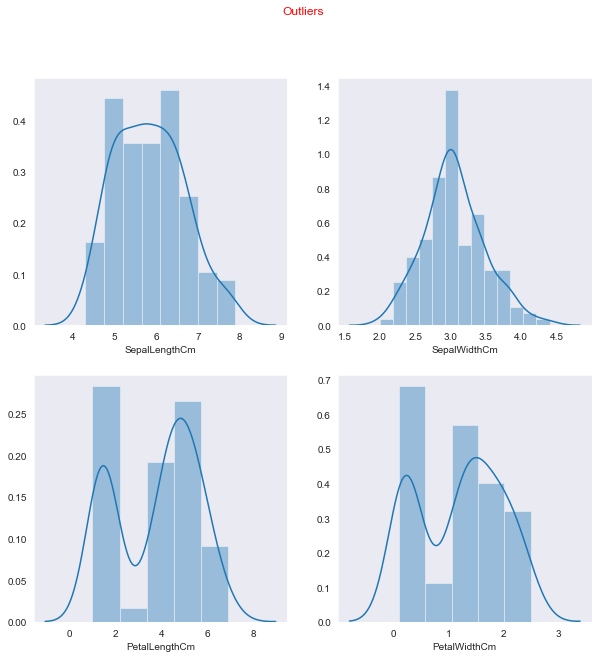

In [7]:
fig,(a1,a2) =plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Outliers",color="red")
sns.distplot(df["SepalLengthCm"],ax=a1[0])
sns.distplot(df["SepalWidthCm"],ax=a1[1])
sns.distplot(df["PetalLengthCm"],ax=a2[0])
sns.distplot(df["PetalWidthCm"],ax=a2[1])

Feature Engineering

In [8]:
fea=df[['SepalLengthCm','SepalWidthCm']]

Scaling the features

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
scale=StandardScaler()
scaled_fea=scale.fit_transform(fea)

# here we built 6 clusters and save their corresponding with in cluster sum of squares (wcss) and then we plot the no. of clusters with wcss

In [11]:
wcss=[] #within cluster sum of squares

for i in range(1,7):
    model=KMeans(i)
    model.fit(scaled_fea)
    wcss.append(model.inertia_)
    df[f"Clusters{i}"]=model.predict(scaled_fea)
df.head()    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters1,Clusters2,Clusters3,Clusters4,Clusters5,Clusters6
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0,3,4,3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0,3,4,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0,3,4,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0,3,4,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0,1,2,3


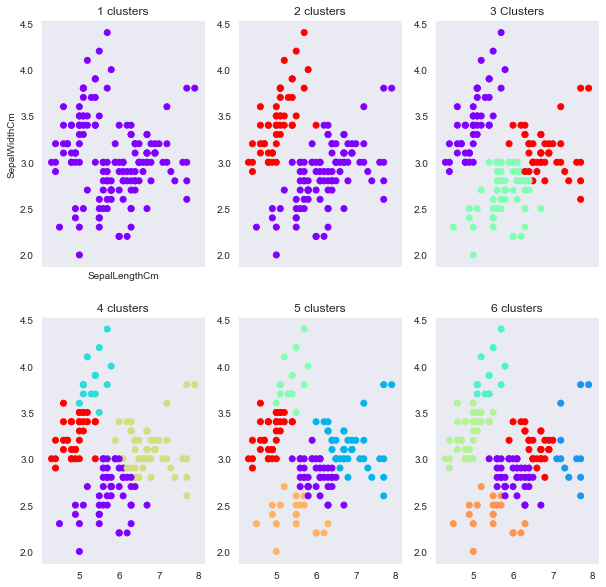

In [12]:
fig,(a1,a2)=plt.subplots(2,3,figsize=(10,10),sharex=True)
a1[0].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters1"],cmap='rainbow')
a1[0].set_xlabel('SepalLengthCm')
a1[0].set_ylabel('SepalWidthCm')
a1[0].set_title('1 clusters')
a1[1].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters2"],cmap='rainbow')
a1[1].set_title('2 clusters')
a1[2].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters3"],cmap='rainbow',label='# clusters')
a1[2].set_title('3 Clusters')
a2[0].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters4"],cmap='rainbow')
a2[0].set_title('4 clusters')
a2[1].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters5"],cmap='rainbow')
a2[1].set_title('5 clusters')
a2[2].scatter(df.SepalLengthCm,df.SepalWidthCm,c=df["Clusters6"],cmap='rainbow')
a2[2].set_title('6 clusters')
plt.show()

# with the help of Elbow rule we can see that 3 clusters are optimum,because wcss should neither be too high nor too less

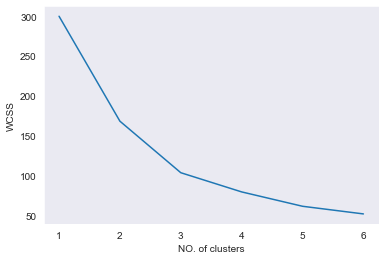

In [13]:
plt.plot(range(1,7),wcss)
plt.xlabel('NO. of clusters')
plt.ylabel('WCSS')
plt.show()